# HSE 2021: Mathematical Methods for Data Analysis

## Homework 2

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 

In [1016]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.datasets import load_boston

%matplotlib inline

sns.set(style="darkgrid")

### Data

For this homework we use Boston Dataset from sklearn (based on UCI ML housing dataset).

In [1017]:
data = load_boston()

X = data.data
Y = data.target
columns = data.feature_names

## Linear regression

#### 1. [0.5 points] 
Create Pandas DataFrame and split the data into train and test sets with ratio 80:20 with random_state=0.

In [1018]:
from sklearn.model_selection import train_test_split

df = pd.DataFrame(X, columns = columns)
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, train_size = 0.8, random_state = 0)

---
#### 2. [1 point] 
Train models on train data using StatsModels( or sckit-learn) library and apply it to the test set; use $RMSE$ and $R^2$ as the quality measure.

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.01$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.01$

Don't forget to scale the data before training the models with StandardScaler!

In [1019]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
X_train_scal = scal.fit_transform(X_train)
X_test_scal = scal.fit_transform(X_test)

In [1020]:
import statsmodels.api as sm

X_train_scal = sm.add_constant(X_train_scal)
X_test_scal = sm.add_constant(X_test_scal)

In [1021]:
from sklearn.metrics import mean_squared_error, r2_score

model = sm.OLS(Y_train, X_train_scal)
linear_model = model.fit()
pred = linear_model.predict(X_test_scal)

print("RMSE of Linear regression model: {}".format(mean_squared_error(Y_test, pred, squared = False)))
print("R^2  of Linear regression model: {}".format(r2_score(Y_test, pred)))

RMSE of Linear regression model: 5.925910966196957
R^2  of Linear regression model: 0.5687450086990004


In [1022]:
ridge = sm.OLS(Y_train, X_train_scal)

ridge_model = ridge.fit_regularized(alpha=0.01, L1_wt=0)
pred = ridge_model.predict(X_test_scal)

print("RMSE of Ridge model: ", mean_squared_error(Y_test, pred, squared=False))
print("R^2 of Ridge model: ", r2_score(Y_test, pred))

RMSE of Ridge model:  5.93955655334299
R^2 of Ridge model:  0.5667566214361275


In [1023]:
lasso = sm.OLS(Y_train, X_train_scal)
lasso_model = lasso.fit_regularized(alpha=0.01, L1_wt=1)
pred = lasso_model.predict(X_test_scal)

print("RMSE of Lasso model: ", mean_squared_error(Y_test, pred, squared=False))
print("R^2 of Lasso model:", r2_score(Y_test, pred))

RMSE of Lasso model:  5.936284546627357
R^2 of Lasso model: 0.567233823655408


---
#### 3. [1 point] 
Explore the values of the parameters of the resulting models and compare the number of zero weights in them. 

Comment on the significance of the coefficients, overal model significance and other related factors from the results table. 

`Hint` Use StatModels to obtain significance of the coefficients. They ca be found on the `summary` of the fitted linear model. 
It might be tricky to obtain `summary` for the regularized model. Please, read the documentation of the StatModels library to figure out how to do that, e.g.   [OLSResults](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults) class might be useful here.

In [1024]:
print(linear_model.params)

[22.61188119 -0.97082019  1.05714873  0.03831099  0.59450642 -1.8551476
  2.57321942 -0.08761547 -2.88094259  2.11224542 -1.87533131 -2.29276735
  0.71817947 -3.59245482]


In [1025]:
print(ridge_model.params)

[22.38800118 -0.9389153   0.9964658  -0.05759679  0.60978151 -1.72221088
  2.61200412 -0.11553458 -2.75390827  1.83481449 -1.6264754  -2.25612295
  0.71882981 -3.52865629]


In [1026]:
print(lasso_model.params)

[22.60188119 -0.94032071  1.02149689  0.          0.59478962 -1.80291733
  2.58516537 -0.06898551 -2.80847418  1.95673449 -1.73917996 -2.27880622
  0.70557048 -3.59691505]


I don't know if there is a significant difference between the models, the parameters seem to be very similar. Lasso model has 1 zero weight, while other have none. Params x3 and x7 seem to be the most insignificant overall, since they are the closest to zero in all models.

---
#### 4. [1 point] 
Implement one of the elimination algorithms that were described in the Seminar_4 (Elimination by P-value, Forward elimination, Backward elimination), make conclusions. 
It's enough to apply to one of the models above (e.g simple linear regression)

In [1027]:
def build(df, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(df, Y, train_size = 0.8, random_state = 0)

    scal = StandardScaler()
    X_train_scal = scal.fit_transform(X_train)
    X_test_scal = scal.transform(X_test)

    X_train_scal = sm.add_constant(X_train_scal)
    X_test_scal = sm.add_constant(X_test_scal)

    return(linear_regression(X_train_scal, X_test_scal, Y_train, Y_test))

def linear_regression(X_train_scal, X_test_scal, Y_train, Y_test):
    model = sm.OLS(Y_train, X_train_scal)
    linear_model = model.fit()
    pred = linear_model.predict(X_test_scal)
    rmse = mean_squared_error(Y_test, pred, squared = False)

    return linear_model, rmse

In [1028]:
def elimination_by_p_value(df, Y):
    model, rmse = build(df, Y)

    next_model = model
    next_rmse = rmse

    while(next_rmse <= rmse):
        model = next_model
        rmse = next_rmse

        max_ind = 0
        for i in range(len(model.pvalues)):
            if (model.pvalues.max() == model.pvalues[i]):
                max_ind = i - 1
                break
        df = df.drop(df.columns[max_ind], axis=1)
        next_model, next_rmse = build(df, Y)
        
    return model

In [1029]:
print(elimination_by_p_value(df, Y).summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.765    
Dependent Variable: y                AIC:                2370.9385
Date:               2021-10-11 19:18 BIC:                2426.9583
No. Observations:   404              Log-Likelihood:     -1171.5  
Df Model:           13               F-statistic:        102.2    
Df Residuals:       390              Prob (F-statistic): 9.64e-117
R-squared:          0.773            Scale:              20.020   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     22.6119     0.2226   101.5764   0.0000   22.1742   23.0495
x1        -0.9708     0.2980    -3.2575   0.0012   -1.5568   -0.3849
x2         1.0571     0.3408     3.1022   0.0021    0.3872    1.7271
x3         0.0383     0.4428     0.0865   0.9311   -0.8324    0.9090

As far as I understand, we made the model better without deleting any of the elements. That may mean all of the elements are significant to the model, or not, because elimination by p-value stops after deleting the first feature (Since deleting the second feature will improve the model, but deleting third and e.t.c will make the rmse worse).

---
#### 5. [1 point] 
Find the best (in terms of RMSE) $\alpha$ for Ridge regression using cross-validation with 5 folds. You must select values from range $[10^{-4}, 10^{3}]$.

In [1030]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


X_train, X_test, Y_train, Y_test = train_test_split(df, Y, train_size = 0.8, random_state = 0)

scal = StandardScaler()

X_train_scal = scal.fit_transform(X_train)
X_train_scal = sm.add_constant(X_train_scal)

X_test_scal = scal.transform(X_test)
X_test_scal = sm.add_constant(X_test_scal)

params = {'alpha': np.logspace(-4, 3, 100)}

ridge_model = Ridge()
find = GridSearchCV(ridge_model, params, scoring='neg_root_mean_squared_error')
find.fit(X_train_scal, Y_train)

print("Best alpha for Ridge regression: {}".format(find.best_params_))

Best alpha for Ridge regression: {'alpha': 7.56463327554629}


---
## Gradient descent

#### 6. [3.5 points] 
**Implement a linear regression model for the MSE loss function, trained by gradient descent.**

All calculations must be vectorized, and python loops can only be used for gradient descent iterations. As a stop criterion, you must use (simultaneously):

* checking for the Euclidean norm of the weight difference on two adjacent iterations (for example, less than some small number of the order of $10^{-6}$, set by the `tolerance` parameter);
* reaching the maximum number of iterations (for example, 10000, set by the `max_iter` parameter).

You need to implement:

* Full gradient descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Stochastic Gradient Descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is the estimate of the gradient over the batch of objects selected randomly.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} q_{i_{k}} (w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

Exponentially weighed averages can provide a better estimate which is closer to the actual gradient.


To make sure that the optimization process really converges, we will use the `loss_history` class attribute. After calling the `fit` method, it should contain the values of the loss function for all iterations, starting from the first one (before the first step on the anti-gradient).

You need to initialize the weights with a zero or random (from a normal distribution) vector. The following is a template class that needs to contain the code implementing all variations of the models.

In [1031]:
from sklearn.base import BaseEstimator

class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum', 
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum'
        delta: float
            proportion of object in a batch (fot stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        """
        
        self.gd_type = gd_type
        self.delta = delta
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        if w0 is None:
            self.w0 = np.zeros(X.shape[1]+1)
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
    
    def fit(self, X, Y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []

        self.w0 = np.random.rand(X_train_scal[0].size)
        weights = self. w =  self.w0

        h = 0
        for i in range(self.max_iter):
            if (self.gd_type == 'GradientDescent'):
                weights = self.w - self.eta * self.calc_gradient(X, Y)
            elif(self.gd_type == 'StochasticDescent'):
                ind = np.random.randint(0, len(X), len(X) // 30 + 1)
                weights = self.w - self.eta * self.calc_gradient(np.take(X, ind, axis = 0), np.take(Y, ind))
            elif(self.gd_type == 'Momentum'):
                h = self.alpha * h + self.eta * self.calc_gradient(X, Y)
                weights = self.w - h
 
            self.w, weights = weights, self.w

            self.loss_history.append(self.calc_loss(X, Y))

            if(self.tolerance >= np.linalg.norm(self.w - weights)):
                break

        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')

        return X.dot(np.transpose(self.w))
    
    def calc_gradient(self, X, Y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """

        return (2 * np.transpose(X).dot(self.predict(X) - Y) / Y.size)

    def calc_loss(self, X, Y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """

        return (((self.predict(X) - Y) ** 2).mean())

#### 7. [1 points] 
Train and validate "hand-written" model (simple linear regression) on the same data, and compare the quality with the Sklearn or StatsModels methods. Investigate the effect of the `max_iter` and `alpha` parameters on the optimization process. Is it consistent with your expectations?

In [1032]:
print("RMSE of Statmodels Linear regression model: {}".format(mean_squared_error(Y_test, pred, squared = False)))
print("R^2  of Statmodels Linear regression model: {}".format(r2_score(Y_test, pred)))

RMSE of Statmodels Linear regression model: 5.936284546627357
R^2  of Statmodels Linear regression model: 0.567233823655408


In [1033]:
def Gradient(iter):

    w = np.random.rand(X_train_scal[0].size)

    graD = LinReg(gd_type = 'GradientDescent', w0 = w, max_iter = iter)
    graD.fit(X_train_scal, Y_train)

    return graD


def Stochastic(iter):
    w = np.random.rand(X_train_scal[0].size)

    StocD = LinReg(gd_type='StochasticDescent', w0 = w, max_iter = iter)
    StocD.fit(X_train_scal, Y_train)

    return StocD


def Momentum(iter, alpha):
    w = np.random.rand(X_train_scal[0].size)
    
    moment = LinReg(gd_type='Momentum', w0 = w, max_iter = iter, alpha = alpha)
    moment.fit(X_train_scal, Y_train)

    return moment


In [1034]:

def test_gradient_descent(iter):
    
    print("TESTING GRADIENT DESCENT WITH MAX_ITER = {}".format(iter))

    pred = Gradient(iter).predict(X_test_scal)

    print("RMSE of Gradient Descent: {}".format(mean_squared_error(Y_test, pred, squared=False)))
    print("R^2 of Gradient Descent: {}".format(r2_score(Y_test, pred)))


def test_stochastic_descent(iter):
    print("TESTING STOCHASTIC DESCENT WITH MAX_ITER = {}".format(iter))

    pred = Stochastic(iter).predict(X_test_scal)

    print("RMSE of Stochastic Descent: {}".format(mean_squared_error(Y_test, pred, squared=False)))
    print("R^2 of Stochastic Descent: {}".format(r2_score(Y_test, pred)))

def test_momentum(iter, a):
    print("TESTING MOMENTUM WITH MAX_ITER = {} AND ALPHA = {}".format(iter, a))

    pred = Momentum(iter, a).predict(X_test_scal)

    print("RMSE of Momentum: {}".format(mean_squared_error(Y_test, pred, squared=False)))
    print("R^2 of Momentum: {}".format(r2_score(Y_test, pred)))


In [1035]:
test_gradient_descent(iter = 100)
test_stochastic_descent(iter = 100)

TESTING GRADIENT DESCENT WITH MAX_ITER = 100
RMSE of Gradient Descent: 7.005859474622355
R^2 of Gradient Descent: 0.3972367941273537
TESTING STOCHASTIC DESCENT WITH MAX_ITER = 100
RMSE of Stochastic Descent: 7.09077244218424
R^2 of Stochastic Descent: 0.3825369317393038


In [1036]:
test_gradient_descent(iter = 1000)
test_stochastic_descent(iter = 1000)

TESTING GRADIENT DESCENT WITH MAX_ITER = 1000
RMSE of Gradient Descent: 5.819569468811432
R^2 of Gradient Descent: 0.5840840228242952
TESTING STOCHASTIC DESCENT WITH MAX_ITER = 1000
RMSE of Stochastic Descent: 5.7929706582000176
R^2 of Stochastic Descent: 0.5878772891464092


In [1037]:
test_momentum(iter = 100, a = 0.1)
test_momentum(iter = 100, a = 0.5)
test_momentum(iter = 100, a = 0.99)

TESTING MOMENTUM WITH MAX_ITER = 100 AND ALPHA = 0.1
RMSE of Momentum: 6.741552355531803
R^2 of Momentum: 0.44185927317324725
TESTING MOMENTUM WITH MAX_ITER = 100 AND ALPHA = 0.5
RMSE of Momentum: 6.138069260270032
R^2 of Momentum: 0.5373128273374872
TESTING MOMENTUM WITH MAX_ITER = 100 AND ALPHA = 0.99
RMSE of Momentum: 7.5797901110054
R^2 of Momentum: 0.29443301641554054


In [1038]:
test_momentum(1000, a = 0.1)
test_momentum(1000, a = 0.5)
test_momentum(1000, a = 0.99)

TESTING MOMENTUM WITH MAX_ITER = 1000 AND ALPHA = 0.1
RMSE of Momentum: 5.814725461868081
R^2 of Momentum: 0.5847761226124584
TESTING MOMENTUM WITH MAX_ITER = 1000 AND ALPHA = 0.5
RMSE of Momentum: 5.790574587303861
R^2 of Momentum: 0.5882181405240953
TESTING MOMENTUM WITH MAX_ITER = 1000 AND ALPHA = 0.99
RMSE of Momentum: 5.77051291640068
R^2 of Momentum: 0.5910664664339889


I tested each model on 100 and 1000 iterations. Momentum models have also been tested with low, middle and high values for the alpha parameter. Out of all three models, stochastic descent seems to be the worst and Momentum seems to the best. Increasing the amount of iterations seems to substantially improve the quality of predictions (which is not surprising). Increasing the alpha parameter also improves the Momentum model so much so that wuth 1000 iterations and a = 0.99 it can compete with Statmodels model (while others lose or seem to be a little bit worse).

#### 8. [1 points] 
Plot graphs (on the same picture) of the dependence of the loss function value on the iteration number for Full GD, SGD and Momentum. Draw conclusions about the rate of convergence of various modifications of gradient descent.

Don't forget about what *beautiful* graphics should look like!

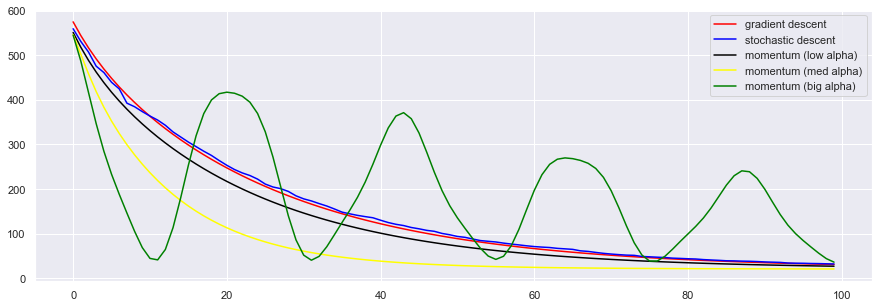

In [1039]:
plt.figure(figsize = (15, 5))
plt.plot(Gradient(100).loss_history, label='gradient descent', color = 'red')
plt.plot(Stochastic(100).loss_history, label='stochastic descent', color = 'blue')
plt.plot(Momentum(100, 0.1).loss_history, label='momentum (low alpha)', color = 'black')
plt.plot(Momentum(100, 0.5).loss_history, label='momentum (med alpha)', color = 'yellow')
plt.plot(Momentum(100, 0.99).loss_history, label='momentum (big alpha)', color = 'green')
plt.legend()
plt.show()


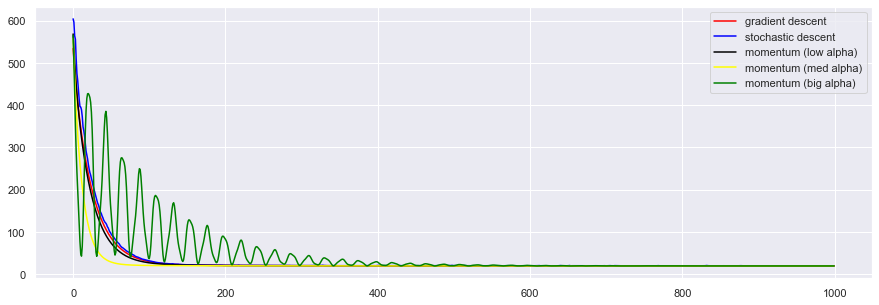

In [1040]:
plt.figure(figsize = (15, 5))
plt.plot(Gradient(1000).loss_history, label='gradient descent', color = 'red')
plt.plot(Stochastic(1000).loss_history, label='stochastic descent', color = 'blue')
plt.plot(Momentum(1000, 0.1).loss_history, label='momentum (low alpha)', color = 'black')
plt.plot(Momentum(1000, 0.5).loss_history, label='momentum (med alpha)', color = 'yellow')
plt.plot(Momentum(1000, 0.99).loss_history ,label='momentum (big alpha)', color = 'green')
plt.legend()
plt.show()


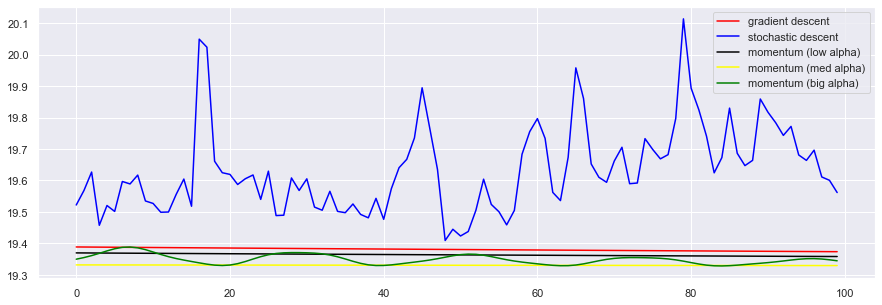

In [1041]:
plt.figure(figsize = (15, 5))
plt.plot(Gradient(1000).loss_history[900:], label='gradient descent', color = 'red')
plt.plot(Stochastic(1000).loss_history[900:], label='stochastic descent', color = 'blue')
plt.plot(Momentum(1000, 0.1).loss_history[900:], label='momentum (low alpha)', color = 'black')
plt.plot(Momentum(1000, 0.5).loss_history[900:], label='momentum (med alpha)', color = 'yellow')
plt.plot(Momentum(1000, 0.99).loss_history[900:], label='momentum (big alpha)', color = 'green')
plt.legend()
plt.show()


From the first graph we can see that stochastic descent and gradient descent may seem quite similar in terms of of their relation to the loss function. However if we look at the last 100 iterations -  we see that whilst the gradient descent loss has stabilized, stochastic descent loss is still all over the place. But the most interesting model by far is the Momentum with big alpha. The more alpha seems to be - the more model will deviate in both directions. In the end, all Momentum models will come at nearly the same place (with Momentum (middle alpha) showing the best results). But the path over there is different for each model with a different alpha parameter.